# Export variables related to anthropogenic heat
- This script is used to export variables related to anthropogenic heat from simulations;
- Simulations: CNTL, TRAF at FR-Capitole. 

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [4]:
data_list = []
for case in ['cntl', 'traffic']:
    ds_case = xr.open_dataset(f'{home_path}0_urban_traffic/archive/FR-Cap_{case}/lnd/hist/FR-Cap_{case}.clm2.h0.2004-02-20-03600.nc')
    df_case = pd.DataFrame({'time': ds_case['time'].values})
    df_case['time'] = pd.to_datetime(ds_case['time'].values)
    df_case['time'] = df_case['time'].dt.round('min')
    df_case['time'] = df_case['time'].dt.ceil('min')
    df_case['month'] = df_case['time'].dt.month
    df_case['hour'] = df_case['time'].dt.hour
    df_case['year'] = df_case['time'].dt.year
    df_case['minute']=df_case.time.dt.minute
    df_case['diurnal']=df_case['hour'].astype(str).str.zfill(2) + ':' + df_case['minute'].astype(str).str.zfill(2)
    df_case['URBAN_AC'] = ds_case['URBAN_AC'].values
    df_case['URBAN_HEAT'] = ds_case['URBAN_HEAT'].values
    df_case['VENTILATION'] = ds_case['VENTILATION'].values
    df_case['WASTEHEAT'] = ds_case['WASTEHEAT'].values
    df_case['FGR_U'] = ds_case['FGR_U'].values
    if case == 'cntl':
        df_case['TRAFFICFLUX'] = 0
    else:    
        df_case['TRAFFICFLUX'] = ds_case['TRAFFICFLUX'].values
    df_case['AHF'] = df_case['URBAN_HEAT'] + df_case['WASTEHEAT'] + df_case['TRAFFICFLUX']  
    df_case['case'] = case
    data_list.append(df_case)
df_data = pd.concat(data_list) 
df_data.to_csv('./data_for_figure/FR-Capitole.csv', index=False)      
df_data

,time,month,hour,year,minute,diurnal,URBAN_AC,URBAN_HEAT,VENTILATION,WASTEHEAT,FGR_U,TRAFFICFLUX,AHF,case
0,2004-02-20 01:00:00,2,1,2004,0,01:00,0.0,21.110060,5.942730,4.155546,-90.729370,0.000000,25.265606,cntl
1,2004-02-20 01:30:00,2,1,2004,30,01:30,0.0,21.637337,5.791717,4.222012,-79.338600,0.000000,25.859348,cntl
2,2004-02-20 02:00:00,2,2,2004,0,02:00,0.0,22.147747,5.939824,4.327467,-70.291939,0.000000,26.475214,cntl
3,2004-02-20 02:30:00,2,2,2004,30,02:30,0.0,22.663204,6.076488,4.429549,-68.214928,0.000000,27.092754,cntl
4,2004-02-20 03:00:00,2,3,2004,0,03:00,0.0,23.162970,6.222219,4.532641,-68.521378,0.000000,27.695610,cntl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,2005-02-28 21:00:00,2,21,2005,0,21:00,0.0,28.412292,8.334914,5.554090,-88.198746,25.113029,59.079414,traffic
17993,2005-02-28 21:30:00,2,21,2005,30,21:30,0.0,29.099693,8.347181,5.682458,-83.765800,25.113029,59.895180,traffic
17994,2005-02-28 22:00:00,2,22,2005,0,22:00,0.0,29.829979,8.413554,5.819939,-85.513977,20.090422,55.740341,traffic
17995,2005-02-28 22:30:00,2,22,2005,30,22:30,0.0,30.518610,8.553095,5.965996,-83.832314,20.090422,56.575027,traffic


# check

In [2]:
df_data = pd.read_csv('./data_for_figure/FR-Capitole.csv')
df_data['time'] = pd.to_datetime(df_data['time'])
df_data.head()

,time,month,hour,year,minute,diurnal,URBAN_AC,URBAN_HEAT,VENTILATION,WASTEHEAT,FGR_U,TRAFFICFLUX,AHF,case
0,2004-02-20 01:00:00,2,1,2004,0,01:00,0.0,22.241875,6.045159,4.372286,-66.662770,0.0,26.614161,cntl
1,2004-02-20 01:30:00,2,1,2004,30,01:30,0.0,22.827105,5.971417,4.448375,-66.744280,0.0,27.275478,cntl
2,2004-02-20 02:00:00,2,2,2004,0,02:00,0.0,23.363012,6.206764,4.565421,-65.932210,0.0,27.928432,cntl
3,2004-02-20 02:30:00,2,2,2004,30,02:30,0.0,23.899548,6.374155,4.672603,-65.115234,0.0,28.572151,cntl
4,2004-02-20 03:00:00,2,3,2004,0,03:00,0.0,24.393486,6.538073,4.779910,-65.081230,0.0,29.173395,cntl


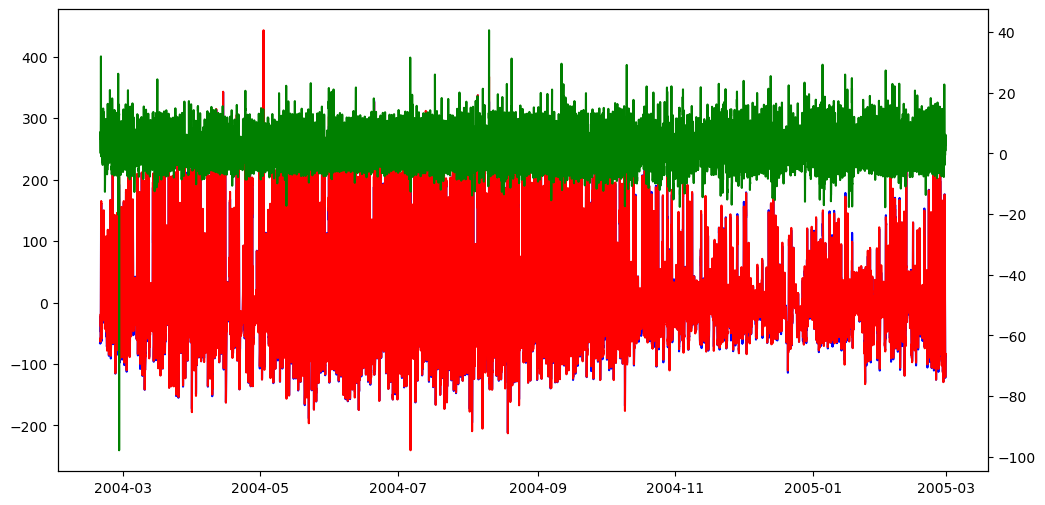

In [19]:
var = 'FGR_U'
#var = 'VENTILATION'
fig, ax = plt.subplots(figsize=(12, 6))
for case in ['cntl', 'traffic']:
    df_case = df_data[df_data['case'] == case]
    ax.plot(df_case['time'], df_case[var], label=case, color='blue' if case == 'cntl' else 'red')
ax2 = ax.twinx()
delta = df_data[df_data['case'] == 'traffic'].reset_index()[var] - df_data[df_data['case'] == 'cntl'].reset_index()[var]
ax2.plot(df_case['time'], delta, label='Difference', color='green')

In [21]:
delta.max()

np.float64(40.538790000000006)